### **Project: `Exchange rate visualisation`**

**Author:** Damian Ferguson<br>
**Created:** 24 Oct 2024<br>
**Last update:** 24 Oct 2024<br>

**Notes:**<br>
Create plots of various exchange rates vs the Euro over time (daily rate, 10 day and 30 day moving averages).

**Data source:** `exchange_rates.csv` (https://www.kaggle.com/datasets/ruchi798/currency-exchange-rates)

### **Set up**

In [1]:
# Install additional packages
#!pip install kaggle
#!pip install kagglehub

In [3]:
# Core libraries
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Specific libraries for this project
from datetime import datetime
from pandas import to_datetime
from matplotlib import ticker

In [4]:
# Project preferences and variables
# Suppress specific warning messages
import warnings
warnings.filterwarnings(action = 'ignore', category = FutureWarning, 
                        message = r".*use_inf_as_na option is deprecated.*")

# Set up preferred colors
pref_grey = 'lightgrey'   # light grey from standard matplotlib colors
pref_blue = '#0173B2'     # dark blue from sns colorblind palette
pref_orange = '#DE8F05'   # light orange from sns colorblind palette

### **Import data**

In [8]:
def download_kaggle_data(kaggle_location):
    """ Download a named data set from Kaggle to a default directory
    and return the local path where the file was downloaded to.
    """
    # Import additional libraries
    import kaggle
    import kagglehub
    
    # Download latest version
    path = kagglehub.dataset_download(kaggle_location)
    
    return path + "/"
    
# Test function works
local_path = download_kaggle_data("ruchi798/currency-exchange-rates")
local_path

'/Users/genaferguson/.cache/kagglehub/datasets/ruchi798/currency-exchange-rates/versions/1056/'

In [10]:
# Download and import data from Kaggle.
path = download_kaggle_data("ruchi798/currency-exchange-rates")

imported_data = pd.read_csv(path + 'exchange_rates.csv', index_col = 0)

# View the data
print(imported_data.info())
imported_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 156964 entries, 0 to 156963
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Country/Currency  156964 non-null  object 
 1   currency          156964 non-null  object 
 2   value             156964 non-null  float64
 3   date              156964 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.0+ MB
None


,Country/Currency,currency,value,date
0,Australia Dollar,AUD,1.581627,17/12/2021
1,Great Britain Pound,GBP,0.851619,17/12/2021
2,Euro,EUR,1.000000,17/12/2021
3,Japan Yen,JPY,128.301759,17/12/2021
4,Switzerland Franc,CHF,1.041015,17/12/2021


In [12]:
# View numeric data overview
imported_data.describe()

,value
count,156964.000000
mean,1889.826485
std,6837.711760
min,0.130975
25%,4.004451
50%,36.773536
75%,404.690299
max,100364.201053


In [14]:
# View object data overview
imported_data.describe(include = 'object')

,Country/Currency,currency,date
count,156964,156964,156964
unique,150,150,1048
top,Australia Dollar,AUD,28/03/2022
freq,1050,1050,299


### **Prepare the data**

In [17]:
# Delete unwanted columns
imported_data.drop(columns = ['Country/Currency'], inplace = True)

# Change column names
imported_data.rename(columns = {'value': 'value_per_euro'}, inplace = True)

# Keep only the currencies required for analysis.
currency_list = ["GBP", "USD", "JPY", "CNY"]
imported_data = imported_data [imported_data['currency'].isin(currency_list)]

# Check for missing values and what to do with them
print("\nCheck for missing values:\n", imported_data.isnull().sum(), "\n")

# Check for duplicate rows and what to do with them
print("\nCheck for duplicate rows:\n", imported_data.duplicated().value_counts(), "\n")

# Change data types
imported_data['date'] = pd.to_datetime(imported_data['date'], dayfirst = True)

#imported_data['date'] = pd.to_datetime(imported_data['date'], format = 'mixed')

# View the data
print(imported_data.info())
imported_data


Check for missing values:
 currency          0
value_per_euro    0
date              0
dtype: int64 


Check for duplicate rows:
 False    4200
Name: count, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 4200 entries, 1 to 156852
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   currency        4200 non-null   object        
 1   value_per_euro  4200 non-null   float64       
 2   date            4200 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 131.2+ KB
None


,currency,value_per_euro,date
1,GBP,0.851619,2021-12-17
3,JPY,128.301759,2021-12-17
5,USD,1.132548,2021-12-17
37,CNY,7.220899,2021-12-17
151,GBP,0.848382,2021-12-18
...,...,...,...
156703,CNY,7.712119,2024-10-29
156816,GBP,0.831589,2024-10-30
156818,JPY,165.815188,2024-10-30
156820,USD,1.082263,2024-10-30


In [19]:
# View aggregated data for each currency
imported_data[['currency', 'date']].groupby('currency')\
    .agg(['count', 'first', 'last', 'min', 'max'])

date                                            
         count      first       last        min        max
currency                                                  
CNY       1050 2021-12-17 2024-10-30 2021-12-17 2024-10-30
GBP       1050 2021-12-17 2024-10-30 2021-12-17 2024-10-30
JPY       1050 2021-12-17 2024-10-30 2021-12-17 2024-10-30
USD       1050 2021-12-17 2024-10-30 2021-12-17 2024-10-30

In [21]:
# View aggregated data for each currency
imported_data[['currency', 'value_per_euro']].groupby('currency')\
    .agg(['count', 'first', 'last', 'min', 'mean', 'std','median', 'max'])

value_per_euro                                                  \
                  count       first        last         min        mean   
currency                                                                  
CNY                1050    7.220899    7.717835    6.735838    7.492148   
GBP                1050    0.851619    0.831589    0.822229    0.858049   
JPY                1050  128.301759  165.815188  124.768629  150.328354   
USD                1050    1.132548    1.082263    0.959445    1.074828   

                                             
                std      median         max  
currency                                     
CNY        0.355898    7.610300    8.098691  
GBP        0.015411    0.857492    0.898720  
JPY       12.272425  149.861927  175.021531  
USD        0.035754    1.081262    1.146527

In [23]:
# Copy imported data into a new dataframe for analysis
fx = imported_data.copy()

# View the data
print(fx.info())
fx.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4200 entries, 1 to 156852
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   currency        4200 non-null   object        
 1   value_per_euro  4200 non-null   float64       
 2   date            4200 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 131.2+ KB
None


,currency,value_per_euro,date
1,GBP,0.851619,2021-12-17
3,JPY,128.301759,2021-12-17
5,USD,1.132548,2021-12-17
37,CNY,7.220899,2021-12-17
151,GBP,0.848382,2021-12-18


### **Create visualisations**

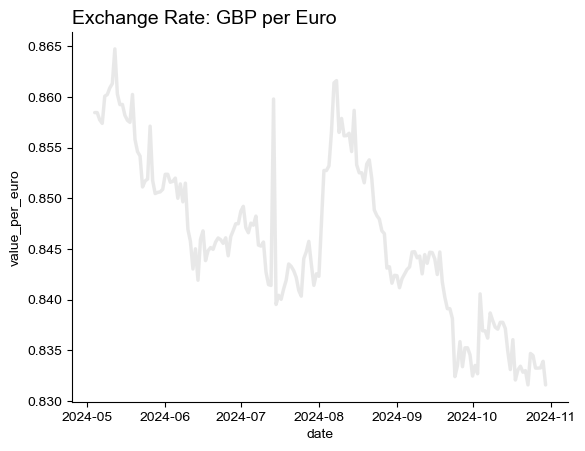

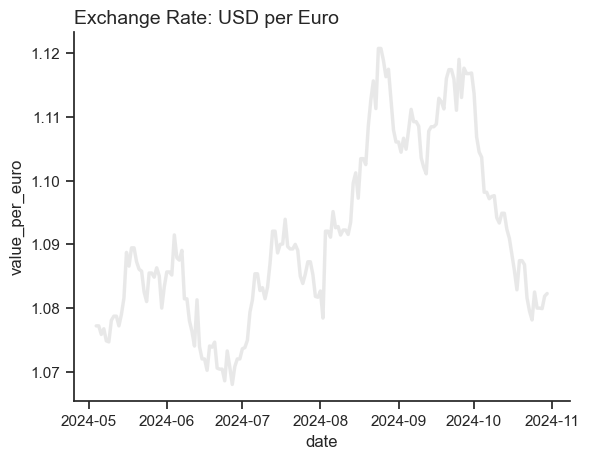

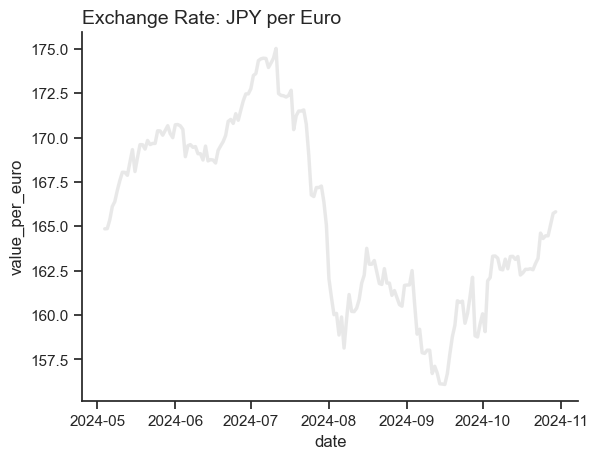

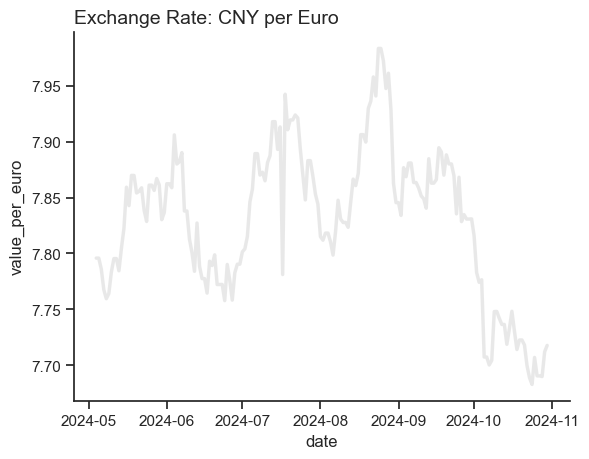

In [26]:
def plot_fx(currency, last_x_days):
    """ Create a plot of exchange rate over time vs Euro showing
    daily exchange rate.
    """
    
    # Create the chart data for specified currency.
    chart_data = fx [fx['currency'] == currency]

    # Retain on the specified last number of days worth of data.    
    chart_data = chart_data.tail(last_x_days)

    # Set up the plot.
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    sns.set(style = "ticks")

    # Plot daily exchange rate.
    sns.lineplot(data = chart_data, x = 'date', y = 'value_per_euro',
                 label = "Daily Rate", color = pref_grey,
                 linewidth = 2.5, alpha = 0.5, legend = None)\
        .set_title(f"Exchange Rate: {currency} per Euro", loc = 'left',
                   size = 14)

    # Customise the plot.
    sns.despine()
    plt.show()


# Test function ---------------------------------------------------------
ndays = 180
currency_list = ["GBP", "USD", "JPY", "CNY"]

for c in currency_list:
    plot_fx(c, ndays)


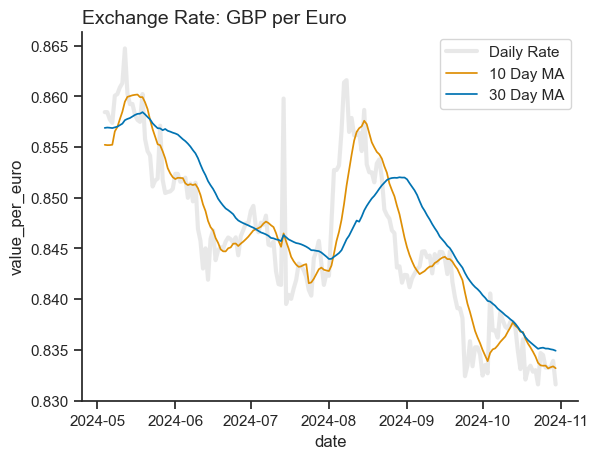

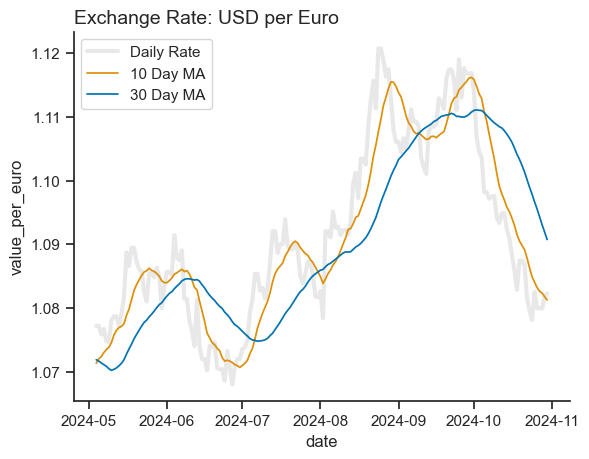

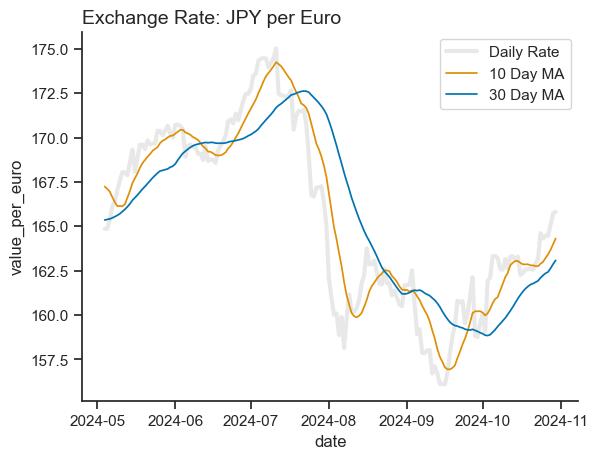

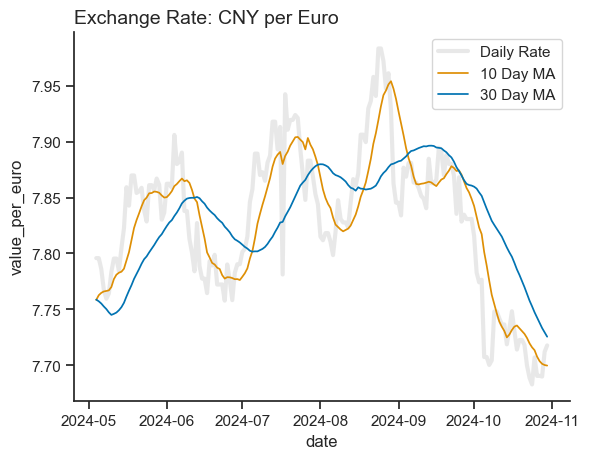

In [28]:
def plot_fx_with_ma(currency, last_x_days, ma_len1, ma_len2 = 0):
    """ Create a plot of exchange rate over time vs Euro showing
    daily exchange rate and two moving averages (second moving
    average is optional).
    """

    # Create the chart data for specified currency.
    chart_data = fx [fx['currency'] == currency].copy()

    # Calculate the first moving average.
    chart_data['moving_avg1'] = chart_data['value_per_euro']\
                                        .rolling(ma_len1).mean()

    # If required, calculate the second moving average.
    if ma_len2 != 0:
        chart_data['moving_avg2'] = chart_data['value_per_euro']\
                                        .rolling(ma_len2).mean()

    # Remove rows with a null vales ( insufficient data
    # to calculate a moving avaerage value.
    chart_data.dropna(inplace = True)

    # Retain on the specified last number of days worth of data.    
    chart_data = chart_data.tail(last_x_days)

    # Set up the plot.
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    sns.set(style = "ticks")

    # Plot daily exchange rate.
    sns.lineplot(data = chart_data, x = 'date', y = 'value_per_euro',
                 label = "Daily Rate", color = pref_grey,
                 linewidth = 3, alpha = 0.5)\
        .set_title(f"Exchange Rate: {currency} per Euro", loc = 'left',
                   size = 14)
    
    # Plot the first moving average.
    sns.lineplot(data = chart_data, x = 'date', y = 'moving_avg1',
                 label = f"{ma_len1} Day MA", color = pref_orange,
                 linewidth = 1.25)
    
    # If required, plot the second moving average.
    if ma_len2 != 0:
        sns.lineplot(data = chart_data, x = 'date', y = 'moving_avg2',
                     label = f"{ma_len2} Day MA", color = pref_blue,
                     linewidth = 1.25)

    # Customise the plot.
    sns.despine()
    plt.show()


# Test function ---------------------------------------------------------
# Set up parameter values.
currency_list = ["GBP", "USD", "JPY", "CNY"]
ndays = 180
ma_len1 = 10
ma_len2 = 30

# Run the function with specified parameter values.
for c in currency_list:
    plot_fx_with_ma(c, ndays, ma_len1, ma_len2)
    #plt.show()